In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLP Project/UCIdrug_train.csv')
test = pd.read_csv('/content/drive/MyDrive/NLP Project/UCIdrug_test.csv')

In [4]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [6]:
data = pd.concat([df,test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [7]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [9]:
data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

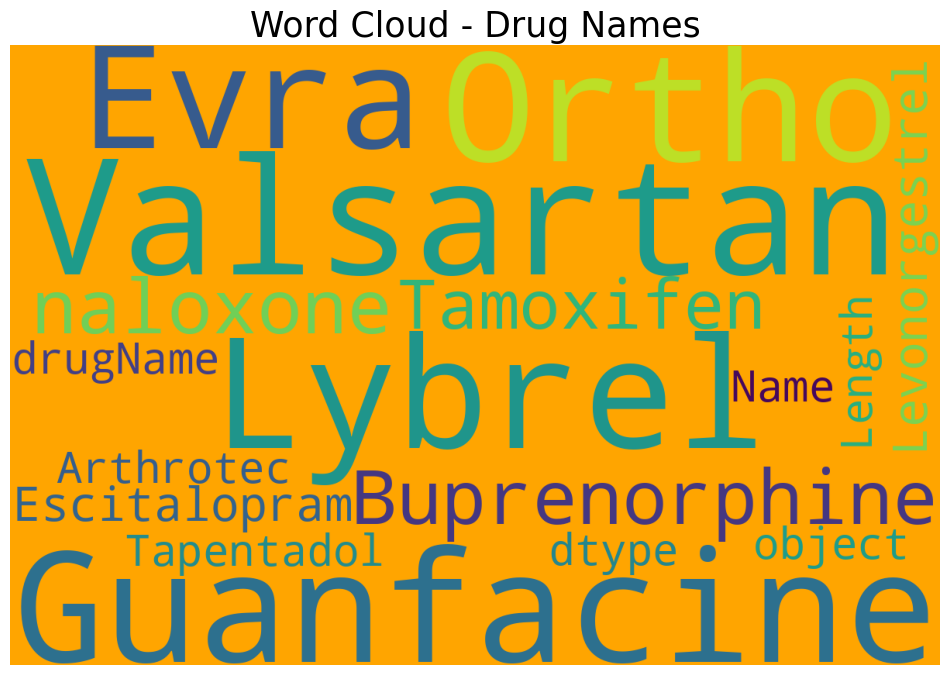

In [10]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (12, 10)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

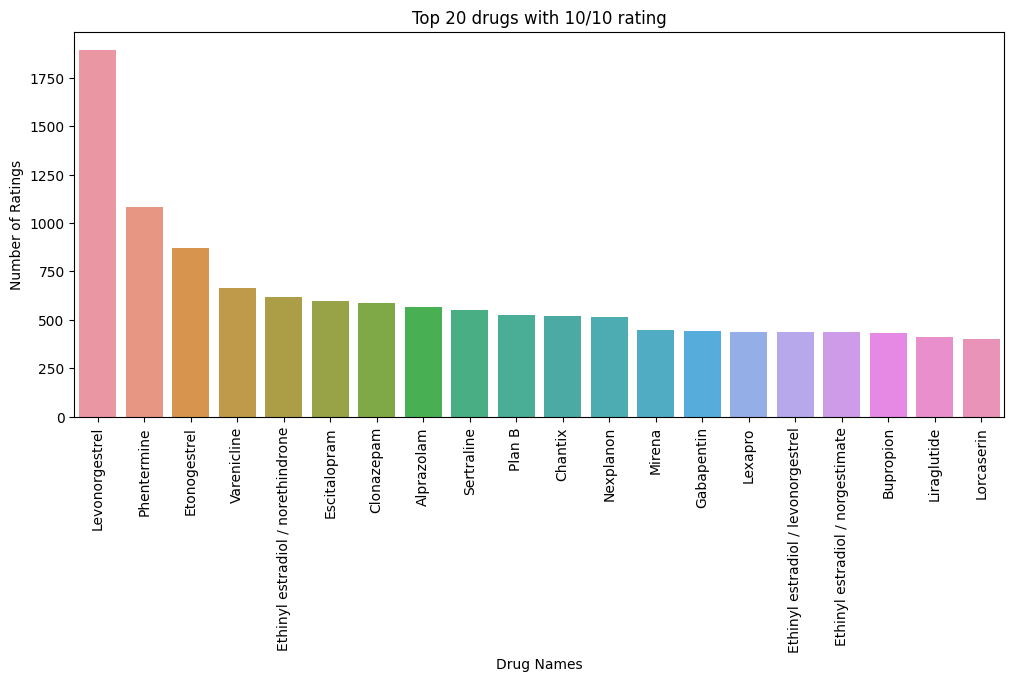

In [11]:
# This barplot shows the top 20 drugs with the 10/10 rating
plt.figure(figsize=(12,5))
rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

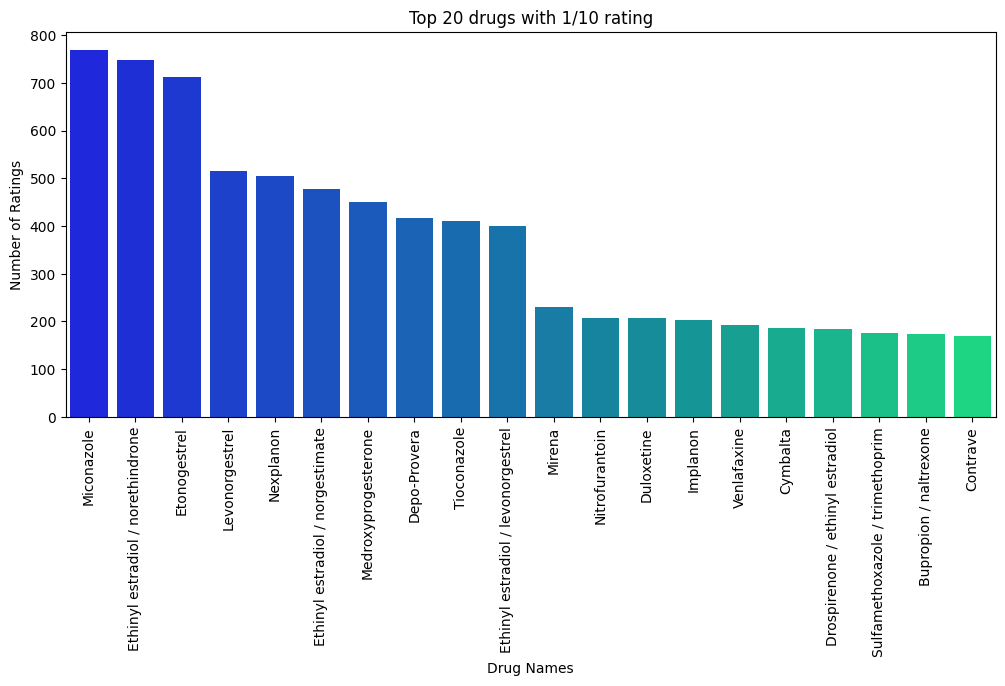

In [12]:
plt.figure(figsize=(12,5))
rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

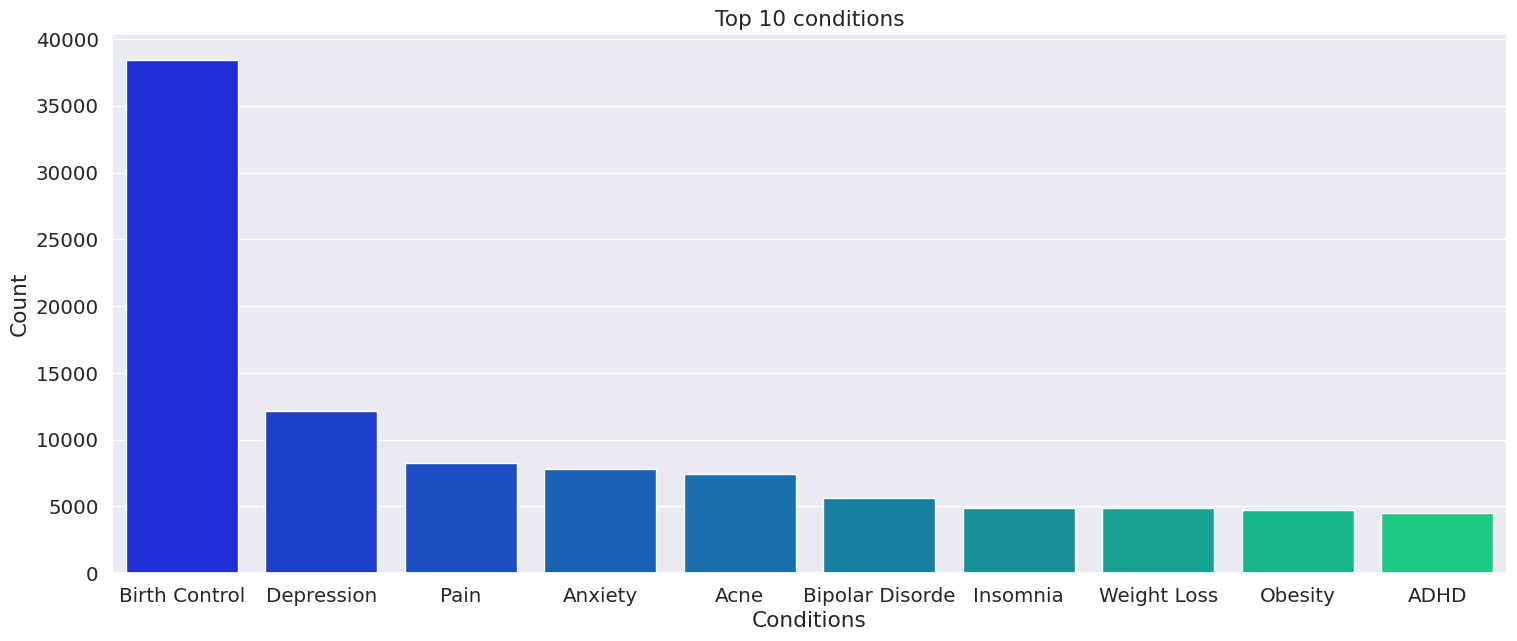

In [13]:
from threading import Condition
# This barplot show the top 10 conditions the people are suffering.
condition = dict(data['condition'].value_counts())
top_condition = list(condition.keys())[0:10]
values = list(condition.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

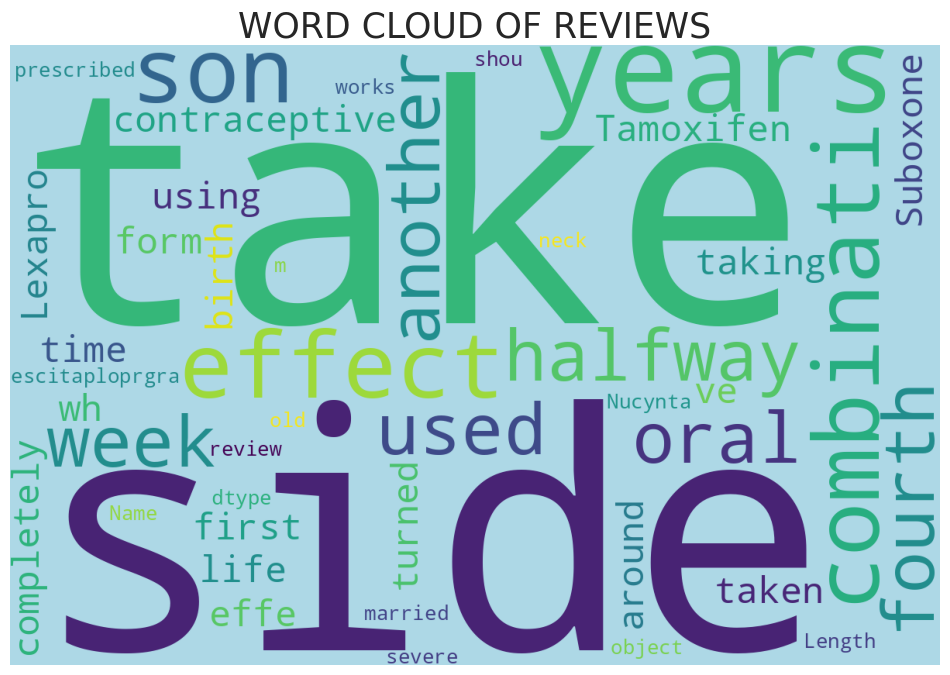

In [14]:
wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (12, 10)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [15]:
data.loc[(data['rating'] >= 7), 'Review_Sentiment'] = 1
data.loc[data['rating'].isin([5, 6]), 'Review_Sentiment'] = 0.5
data.loc[(data['rating'] <= 4), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    142306
0.0     53572
0.5     19185
Name: Review_Sentiment, dtype: int64

<Axes: xlabel='Review_Sentiment', ylabel='Count'>

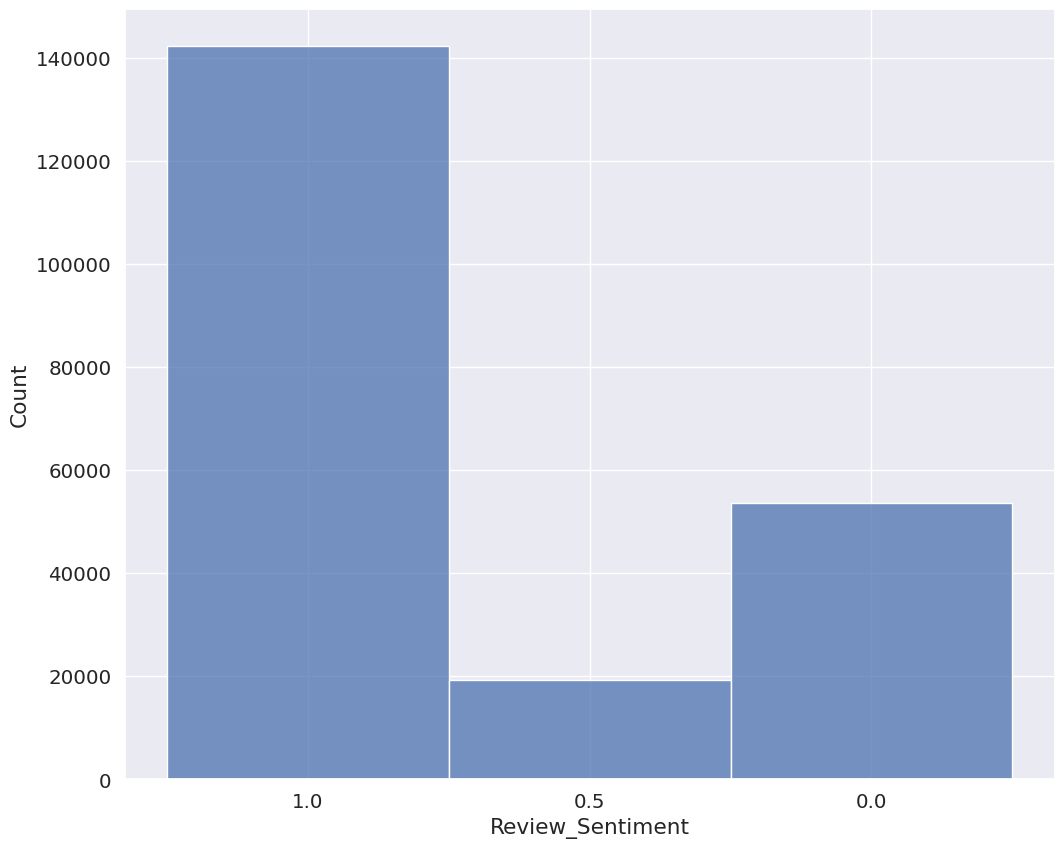

In [16]:
sns.histplot(data['Review_Sentiment'].astype(str))

In [17]:
import pandas as pd
from sklearn.utils import resample

# Assuming 'data' is your DataFrame
data_majority_1 = data[data['Review_Sentiment'] == 1]  # Majority class
data_majority_2 = data[data['Review_Sentiment'] == 0]

# Downsample the majority class to match the size of the minority class
data_minority = data[data['Review_Sentiment'] == 0.5]  # Minority class

# Downsample the majority class to match the size of the minority class
data_majority_1_downsampled = resample(data_majority_1,
                                     replace=False,  # Set to True if you want to sample with replacement
                                     n_samples=len(data_minority),
                                     random_state=42)  # Set a seed for reproducibility

data_majority_2_downsampled = resample(data_majority_2,
                                     replace=False,  # Set to True if you want to sample with replacement
                                     n_samples=len(data_minority),
                                     random_state=42)  # Set a seed for reproducibility

# Combine the downsampled majority class and the minority class
data = pd.concat([data_majority_1_downsampled,data_majority_2_downsampled, data_minority])

# Now, 'data_downsampled' contains a balanced dataset


In [18]:
len(data)

57555

In [19]:
import pandas as pd
from sklearn.utils import resample

# Assuming 'data' is your DataFrame
data_majority_1 = data[data['Review_Sentiment'] == 1]  # Majority class
data_majority_2 = data[data['Review_Sentiment'] == 0]

# Downsample the majority class to match the size of the minority class
data_minority = data[data['Review_Sentiment'] == 0.5]  # Minority class

# Downsample the majority class to match the size of the minority class
data_majority_1_downsampled = resample(data_majority_1,
                                     replace=False,  # Set to True if you want to sample with replacement
                                     n_samples=2000,
                                     random_state=42)  # Set a seed for reproducibility

data_majority_2_downsampled = resample(data_majority_2,
                                     replace=False,  # Set to True if you want to sample with replacement
                                     n_samples=2000,
                                     random_state=42)  # Set a seed for reproducibility

data_minority_downsampled = resample(data_minority,
                                     replace=False,  # Set to True if you want to sample with replacement
                                     n_samples=2000,
                                     random_state=42)

# Combine the downsampled majority class and the minority class
data = pd.concat([data_majority_1_downsampled,data_majority_2_downsampled, data_minority_downsampled])

# Now, 'data_downsampled' contains a balanced dataset


In [20]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [21]:
data['review_clean'] = review_clean(data['review'])

<ipython-input-20-a34c3dd820b2>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
<ipython-input-20-a34c3dd820b2>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
<ipython-input-20-a34c3dd820b2>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
<ipython-input-20-a34c3dd820b2>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
<ipython-input-20-a34c3dd820b2>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


In [22]:
data

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean
130570,227507,Etonogestrel,Birth Control,"""I had Implanon inserted after having my secon...",10,28-Nov-12,2,1.0,i had implanon inserted after having my second...
55691,212505,Lysine,"Herpes Simplex, Suppression","""I&#039;ve had cold sores for as long as I can...",10,5-Sep-16,57,1.0,ive had cold sores for as long as i can rememb...
51286,165284,Phentermine / topiramate,Weight Loss,"""I have a history of diabetes, heart disease a...",9,9-May-13,41,1.0,i have a history of diabetes heart disease and...
81243,183298,Cymbalta,Peripheral Neuropathy,"""At the age of 70, I can go back to interval t...",10,15-Jul-12,51,1.0,at the age of 70 i can go back to interval tra...
91083,157056,Movantik,"Constipation, Drug Induced","""As follow up to my previous post: after takin...",10,28-Jul-15,36,1.0,as follow up to my previous post after taking ...
...,...,...,...,...,...,...,...,...,...
52872,199609,Zonegran,Migraine Prevention,"""The medication worked well to prevent migrain...",5,19-May-17,9,0.5,the medication worked well to prevent migraine...
126846,192870,Drospirenone / ethinyl estradiol,Birth Control,"""I&#039;ve been on Ocella for about 8 months n...",6,9-Jan-10,3,0.5,ive been on ocella for about 8 months now and ...
117087,69138,Fleet Phospho Soda,6</span> users found this comment helpful.,"""This site provided information not on the bot...",6,7-Sep-08,6,0.5,this site provided information not on the bott...
8134,59041,Divalproex sodium,Migraine Prevention,"""2-1/2 months of low-grade migraine (from old ...",6,27-Jul-09,26,0.5,2 1 2 months of low grade migraine from old wh...


In [23]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
nltk.download('stopwords')
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize


# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
from nltk.stem import SnowballStemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [25]:
data['Review_Sentiment'].value_counts()

1.0    2000
0.0    2000
0.5    2000
Name: Review_Sentiment, dtype: int64

In [26]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Load BioBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('monologg/biobert_v1.1_pubmed', do_lower_case=True)
model = BertForSequenceClassification.from_pretrained('monologg/biobert_v1.1_pubmed', num_labels=3)  # Assuming binary sentiment classification

# Assuming data is a DataFrame and 'review_clean' is a column in the DataFrame
train_texts = data['review_clean'].tolist()
train_labels = data['Review_Sentiment'].tolist()  # 1 for positive, 0 for negative sentiment

# Tokenize and encode the dataset
inputs = tokenizer(train_texts, padding=True, truncation=True, return_tensors="pt")
labels = torch.tensor(train_labels)

# Check lengths
assert len(inputs['input_ids']) == len(inputs['attention_mask']) == len(labels), "Size mismatch between tensors"

# Create a PyTorch DataLoader
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Fine-tune the model
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 5

for epoch in range(num_epochs):
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Ensure that labels are of type Long
        labels = labels.long()

        # Calculate the binary cross-entropy loss
        loss = torch.nn.functional.cross_entropy(logits, labels)
        #print("training")
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Update statistics
        total_loss += loss.item()
        _, predicted_labels = torch.max(logits, 1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate accuracy
    accuracy = correct_predictions / total_samples

    # Print epoch statistics
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}')
    print('-' * 50)


tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/biobert_v1.1_pubmed and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 57.8050, Accuracy: 0.6830
--------------------------------------------------
Epoch 2/5, Loss: 41.5863, Accuracy: 0.8022
--------------------------------------------------
Epoch 3/5, Loss: 17.3833, Accuracy: 0.9333
--------------------------------------------------
Epoch 4/5, Loss: 6.2163, Accuracy: 0.9770
--------------------------------------------------
Epoch 5/5, Loss: 4.0905, Accuracy: 0.9857
--------------------------------------------------


In [27]:
# prompt: save the model

torch.save(model.state_dict(), '/content/drive/MyDrive/NLP Project/model.pt')


In [41]:
import torch

# Assuming 'model' is your PyTorch model instance
# Example: model = YourModelClass()

# Save the entire model (including architecture and parameters)
torch.save(model, '/content/drive/MyDrive/NLP Project/modelfull.pth')



In [28]:
test = pd.read_csv('/content/drive/MyDrive/NLP Project/UCIdrug_test.csv')

In [29]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [30]:
test.loc[test['rating'] >= 7, 'Review_Sentiment'] = 1
test.loc[test['rating'].isin([5, 6]), 'Review_Sentiment'] = 0.5
test.loc[test['rating'] <= 4, 'Review_Sentiment'] = 0


In [31]:
test[:1000]

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1.0
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1.0
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1.0
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1.0
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1.0
...,...,...,...,...,...,...,...,...
995,133441,Tri-Sprintec,Birth Control,"""I have been using Tri-Sprintec for a few mont...",7,3-Jul-10,7,1.0
996,51690,Azithromycin,Sinusitis,"""Have had a sinus infection for 11 months... t...",10,21-Feb-15,37,1.0
997,191217,Pentasa,Ulcerative Proctitis,"""I&#039;ve been using pentasa 2 times a day a ...",9,2-Apr-16,1,1.0
998,150787,Sulfamethoxazole / trimethoprim,Acne,"""I cannot believe how amazing this medicine ha...",10,23-Jan-13,47,1.0


In [32]:
test = test[:1000]
test['Review_Sentiment'].value_counts()

1.0    666
0.0    248
0.5     86
Name: Review_Sentiment, dtype: int64

In [44]:
# prompt: load the saved model


# Load the saved model
model = torch.load('/content/drive/MyDrive/NLP Project/modelfull.pth')
model.to('cpu')
# Preprocess the test data
test['review_clean'] = review_clean(test['review'])
stop_words = set(stopwords.words('english'))
test['review_clean'] = test['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
test['review_clean'] = test['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

test_text= test['review_clean'].tolist()
# Tokenize and encode the test data
inputs = tokenizer(test_text, padding=True, truncation=True, return_tensors="pt")

# Make predictions
with torch.no_grad():
    outputs = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    logits = outputs.logits

# Convert logits to predictions
predictions = torch.argmax(logits, dim=1).cpu().numpy()

# Evaluate the predictions
accuracy = metrics.accuracy_score(test['Review_Sentiment'], predictions)
print(f'Accuracy: {accuracy:.4f}')

# Save the predictions
test['Predicted_Sentiment'] = predictions
test.to_csv('/content/drive/MyDrive/NLP Project/test_predictions.csv', index=False)


AttributeError: ignored

In [36]:
from sklearn import metrics

In [48]:
# prompt: load the saved model


# Load the saved model
tokenizer = BertTokenizer.from_pretrained('monologg/biobert_v1.1_pubmed', do_lower_case=True)
model = BertForSequenceClassification.from_pretrained('monologg/biobert_v1.1_pubmed', num_labels=3)

# Load the saved model state_dict
state_dict = torch.load('/content/drive/MyDrive/NLP Project/modelfull.pth', map_location='cpu')

# Load the state_dict into the model
model.load_state_dict(state_dict)

# Move the model to CPU if necessary
model.to('cpu')
# model = torch.load('/content/drive/MyDrive/NLP Project/model.pt')
# model.to('cpu')
# Preprocess the test data
test['review_clean'] = review_clean(test['review'])
stop_words = set(stopwords.words('english'))
test['review_clean'] = test['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
test['review_clean'] = test['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

test_text= test['review_clean'].tolist()
# Tokenize and encode the test data
inputs = tokenizer(test_text, padding=True, truncation=True, return_tensors="pt")

# Make predictions
with torch.no_grad():
    outputs = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    logits = outputs.logits

# Convert logits to predictions
predictions = torch.argmax(logits, dim=1).cpu().numpy()

# Evaluate the predictions
accuracy = metrics.mean_squared_error(test['Review_Sentiment'], predictions)
print(f'Accuracy: {accuracy:.4f}')

# Save the predictions
test['Predicted_Sentiment'] = predictions
test.to_csv('/content/drive/MyDrive/NLP Project/test_predictions.csv', index=False)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/biobert_v1.1_pubmed and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.3615


In [47]:
test

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1.0,ive tri antidepress year citalopram fluoxetin ...
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1.0,son crohn diseas done well asacol complaint sh...
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1.0,quick reduct symptom
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1.0,contrav combin drug use alcohol smoke opioid c...
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1.0,birth control one cycl read review type simila...
...,...,...,...,...,...,...,...,...,...
995,133441,Tri-Sprintec,Birth Control,"""I have been using Tri-Sprintec for a few mont...",7,3-Jul-10,7,1.0,use tri sprintec month ortho tri cyclen lo use...
996,51690,Azithromycin,Sinusitis,"""Have had a sinus infection for 11 months... t...",10,21-Feb-15,37,1.0,sinus infect 11 month tri type antibiot would ...
997,191217,Pentasa,Ulcerative Proctitis,"""I&#039;ve been using pentasa 2 times a day a ...",9,2-Apr-16,1,1.0,ive use pentasa 2 time day total 4 pill defini...
998,150787,Sulfamethoxazole / trimethoprim,Acne,"""I cannot believe how amazing this medicine ha...",10,23-Jan-13,47,1.0,cannot believ amaz medicin cystic acn tri mono...


In [50]:
from sklearn.metrics import accuracy_score

# Assuming 'test['Review_Sentiment']' is your ground truth and 'predictions' is the predicted labels
accuracy = accuracy_score(test['Review_Sentiment'], predictions)

print(f'Accuracy: {accuracy:.4f}')


ValueError: ignored

In [51]:
test['Review_Sentiment'].value_counts()

1.0    666
0.0    248
0.5     86
Name: Review_Sentiment, dtype: int64

In [52]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming 'test['Review_Sentiment']' is your ground truth and 'predictions' is the predicted labels
rounded_predictions = np.round(predictions)

# Convert the continuous ground truth labels to discrete classes
rounded_ground_truth = np.round(test['Review_Sentiment'])

# Calculate accuracy
accuracy = accuracy_score(rounded_ground_truth, rounded_predictions)

print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6500
